In [3]:
'''
Welcome to the Carvana Analytics experiment evaluation assignment!

In this exercise you will be presented with data from a fictional A/B test and asked to evaluate and interpret the results.

Carvana.com is testing a new feature and is running an A/B test to quantify the impact it has on different types of users. Before their first search, a user is bucketed into one of two treatment groups:
  Test - the user is exposed to the new feature
  Control - the user is not exposed to the new feature

All bucketed users can be found in the "users" dataframe/table. This data contains:
  user_id
  region
  treatment

All searches done by users can be found in the "searches" dataframe/table. This data contains:
  user_id
  event_date_time
  device_type
  event_id

As users progress through the website, their searches may return vehicles they are interested in. Clicking on a vehicle takes them to a vehicle detail page, or VDP. This is a strong sign of engagement.

All VDPs done by users can be found in the "vdps" dataframe/table. This data contains:
  user_id
  event_date_time
  device_type
  event_id

A user can purchase a vehicle driectly from a VDP. This constitues a sale and a conversion for the user.

All sales completed by users can be found in the "sales" dataframe/table. This data contains:
  user_id
  event_date_time
  device_type
  event_id

Use the four datasets described to accomplish the following tasks:

1) Evaluate the effect of the new feature on engagement (searches and VDPs) and conversion using statistical significance where applicable
2) Summarize and highlight insights (or issues) in user behavior across various segments
3) Provide a recommendation on whether or not to permanently deploy the feature to all users, some users, or no users

Clone or copy this notebook and run this cell to begin. Once you do so you will be able to work with the data in python and/or write sql queries against the data (see example cells below)

When submitting the assignment please provide a link to your notebook in addition to your typed respones to the items above in .pdf format.

The estimated time for this exercise is 3-4 hours. Please submit your answers to your recruiting coordinator. Good luck!

'''

################################
#### do not alter this code ####
################################

import pandas as pd

! pip install ipython-sql

users_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/users.csv"
searches_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/searches.csv"
vdps_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/vdps.csv"
sales_path="https://s3-us-west-2.amazonaws.com/carvana-analytics-assignment/sales.csv"

users=pd.read_csv(users_path)
searches=pd.read_csv(searches_path)
vdps=pd.read_csv(vdps_path)
sales=pd.read_csv(sales_path)

################################
#### do not alter this code ####
################################

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00


In [ ]:
# Example python subsetting

mobile_searches = searches.loc[searches.device_type == 'Mobile']
mobile_searches

,user_id,event_date_time,device_type,event_id
0,5006,2018-06-28 00:00:00,Mobile,1458680a-5853-4882-833d-4653e3b76bfb
4,11257,2018-06-28 00:00:43,Mobile,ef835228-791f-46f6-a014-ccf993f15d34
7,9494,2018-06-28 00:00:58,Mobile,0f0befed-cc75-41a2-aa18-f6a86ea4d826
8,5006,2018-06-28 00:01:06,Mobile,2a3b786b-e47a-4563-b964-b44e19179a30
15,1863,2018-06-28 00:01:54,Mobile,a4b804d5-5424-4d68-b3d9-886df26507f4
...,...,...,...,...
71207,7363,2018-06-29 00:08:02,Mobile,0b46137a-9594-4c0d-ab7d-8f3330622f9d
71208,1564,2018-06-29 00:08:19,Mobile,bba6aa2c-9fbd-4d76-bd5e-9b5acf161889
71209,1721,2018-06-29 00:08:24,Mobile,7c698f43-177a-41d5-9e21-30a5e8ef8717
71210,1564,2018-06-29 00:09:11,Mobile,3994fe6c-d990-4d95-b86c-0522300c1d6b


REMINDER: CLONE OR COPY THIS NOTEBOOK TO GET STARTED, GOODLUCK!

In [50]:
users.head()
searches.rename(columns={'event_id': 'searchid'}, inplace=True)
searches.head()
vdps.rename(columns={'event_id': 'vdpsid'}, inplace=True)
vdps.head()
sales.rename(columns={'event_id': 'salesid'}, inplace=True)
sales.head()



,user_id,region,treatment
0,1000,Southwest,1
1,1001,New England,1
2,1002,Southeast,1
3,1003,Southwest,1
4,1004,Southeast,1


In [5]:
# Replace 'Test' with 1 and 'Control' with 0 in the 'treatment' column
users['treatment'] = users['treatment'].replace({'Test': 1, 'Control': 0})

# Print the updated dataframe to verify the changes
users.head()

,user_id,region,treatment
0,1000,Southwest,1
1,1001,New England,1
2,1002,Southeast,1
3,1003,Southwest,1
4,1004,Southeast,1


In [6]:
# Merge users with searches
users_searches = pd.merge(users, searches, on='user_id', how='inner')

# Merge users with sales
users_sales = pd.merge(users, sales, on='user_id', how='inner')

# Merge users with vdps
users_vdps = pd.merge(users, vdps, on='user_id', how='inner')


In [ ]:
users_sales.head()

,user_id,region,treatment,event_date_time,device_type,salesid
0,1036,Pacific Northwest,0,2018-06-28 23:01:42,Mobile,ed86e3bf-c1ef-42cb-ac2c-d0c7011a9dc9
1,1056,Southwest,1,2018-06-28 06:28:31,Mobile,b012ecc3-cb1b-48a1-998f-2f1acba8f9e1
2,1077,New England,1,2018-06-29 00:22:33,Desktop,96346611-cf08-4581-a1aa-c39073be6503
3,1093,Southwest,1,2018-06-29 01:17:02,Desktop,e7cc2005-e25d-4107-8462-14abfcf8e3ee
4,1101,New England,1,2018-06-28 13:08:51,Desktop,561091fa-e23b-4ef1-a85b-15208580ff44


In [ ]:
users_vdps.head()

,user_id,region,treatment,event_date_time,device_type,vdpsid
0,1000,Southwest,1,2018-06-28 19:17:41,Mobile,cbfe5abe-13be-4fa0-b06e-bdee5217b7a8
1,1000,Southwest,1,2018-06-28 19:18:39,Mobile,182469de-9e21-46dc-ac55-5bc0a7a3396a
2,1001,New England,1,2018-06-28 23:47:04,Desktop,56affe46-29d4-4eff-956f-0a5ae8b3ecc8
3,1001,New England,1,2018-06-28 23:48:02,Desktop,f95d9865-9345-4104-a443-59e72e2a4863
4,1001,New England,1,2018-06-28 23:49:01,Desktop,32664d34-32fe-4360-ae1c-8a601c1f1b9b


In [13]:
# Drop repeated rows based on the 'user_id' column
users_searches_unique = users_searches.drop_duplicates(subset='user_id', keep='first')

In [8]:
treatment_counts_users_searches = users_searches_unique['treatment'].value_counts()

# Print the counts
print("Number of treatments with '0' in users_searches:", treatment_counts_users_searches[0])
print("Number of treatments with '1' in users_searches:", treatment_counts_users_searches[1])

Number of treatments with '0' in users_searches: 6565
Number of treatments with '1' in users_searches: 6435


In [38]:
users_count = users['treatment'].value_counts()

# Print the counts
print("Number of treatments with '0' in users:", users_count[0])
print("Number of treatments with '1' in users:", users_count[1])

Number of treatments with '0' in users: 6565
Number of treatments with '1' in users: 6435


In [44]:
counts_users_searches = users_searches['treatment'].value_counts()

# Print the counts
print("Number of treatments with '0' in users_searches:", counts_users_searches[0])
print("Number of treatments with '1' in users_searches:", counts_users_searches[1])

Number of treatments with '0' in users_searches: 35047
Number of treatments with '1' in users_searches: 36165


In [16]:
count_user_id = users['user_id'].value_counts
print(count_user_id)

<bound method IndexOpsMixin.value_counts of 0         1000
1         1001
2         1002
3         1003
4         1004
         ...  
12995    13995
12996    13996
12997    13997
12998    13998
12999    13999
Name: user_id, Length: 13000, dtype: int64>


In [48]:
from scipy.stats import ttest_ind

# Number of searches for the test and control groups
searches_test = 36165
searches_control = 35047

# Number of subjects in the test and control groups
subjects_test = 6435
subjects_control = 6565

# Calculate the means and standard deviations
mean_test = searches_test / subjects_test
mean_control = searches_control / subjects_control
std_dev_test = (searches_test * (1 - mean_test)) ** 0.5
std_dev_control = (searches_control * (1 - mean_control)) ** 0.5

# Perform the independent samples t-test
t_stat, p_value = ttest_ind([searches_test, searches_control], [subjects_test, subjects_control])

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 51.71950735429031
p-value: 0.0003736352020246695


In [27]:
users_sales_unique = users_sales.drop_duplicates(subset='user_id', keep='first')

In [28]:
treatment_counts_users_sales = users_sales_unique['treatment'].value_counts()

# Print the counts
print("Number of treatments with '0' in users_sales:", treatment_counts_users_sales[0])
print("Number of treatments with '1' in users_sales:", treatment_counts_users_sales[1])

Number of treatments with '0' in users_sales: 686
Number of treatments with '1' in users_sales: 654


In [42]:
# Conversion rates for the test and control groups
test_sales = 654 / 6435
control_sales = 686 / 6565

# Sample sizes for the test and control groups
n_test = 6435
n_control = 6565

# Calculate the standard error of the difference between the proportions
SE = np.sqrt(test_sales * (1 - test_sales) / n_test + control_sales * (1 - control_sales) / n_control)

# Calculate the z-score
z_score = (test_sales - control_sales) / SE

# Find the p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # two-tailed test

# Print the z-score and p-value
print("Z-score:", z_score)
print("p-value:", p_value)

Z-score: -0.5366150394543616
p-value: 0.5915335534199846


In [30]:
users_vdps_unique = users_vdps.drop_duplicates(subset='user_id', keep='first')

In [31]:
# Assuming 'users_vdps' dataframe is already merged and exists

# Count the number of treatments with '0' and '1' in users_vdps dataframe
treatment_counts_users_vdps = users_vdps_unique['treatment'].value_counts()

# Print the counts
print("Number of treatments with '0' in users_vdps:", treatment_counts_users_vdps[0])
print("Number of treatments with '1' in users_vdps:", treatment_counts_users_vdps[1])

Number of treatments with '0' in users_vdps: 4469
Number of treatments with '1' in users_vdps: 4209


In [41]:
# Conversion rates for the test and control groups
test_vdps = 4209 / 6435
control_vdps = 4469 / 6565

# Sample sizes for the test and control groups
n_test = 6435
n_control = 6565

# Calculate the standard error of the difference between the proportions
SE = np.sqrt(test_vdps * (1 - test_vdps) / n_test + control_vdps * (1 - control_vdps) / n_control)

# Calculate the z-score
z_score = (test_vdps - control_vdps) / SE

# Find the p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))  # two-tailed test

# Print the z-score and p-value
print("Z-score:", z_score)
print("p-value:", p_value)

Z-score: -3.2257125594693843
p-value: 0.0012565948794269755


In the case of total searches made I was interested to see if users performed more searches as a result of the new feature since there was a 100% search rate regardless of group which makes sense as users participating in the study would be engaging with the app in some degree. In the case of searches it did seem to increase the overall searches made by the test group in comparison to the control group. Which was shown in the test where I failed to reject the null hypothesis and the treatment group and search frequency were correlated but near to the acceptance level.

I chose to use the unique counts for vdps and sales made since I was curious to see if the new feature was correlated with an increase in conversion rates between the control and test group for more substantial levels of engagement than searches. In the case of the new product I found in my testing that it was associated with a decrease in vdps activity since I failed to reject the null hypothesis. In the case of sales made however it had no statistical significance and I was able to reject the null hypothesis.

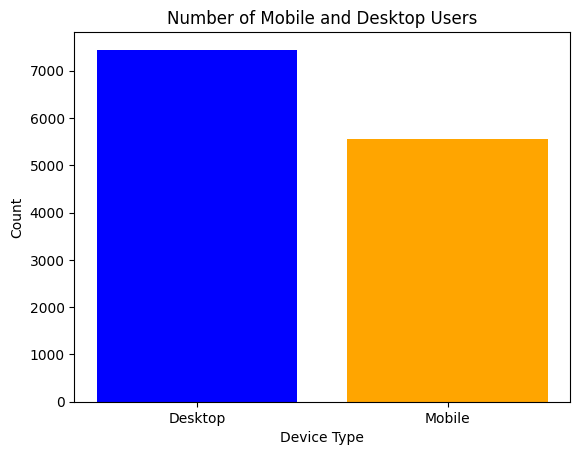

In [51]:
import matplotlib.pyplot as plt

# Assuming 'users' dataframe is already loaded and exists

# Count the number of occurrences for each device type
device_counts = users_searches_unique['device_type'].value_counts()

# Plot the bar graph
plt.bar(device_counts.index, device_counts.values, color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.title('Number of Mobile and Desktop Users')

# Show the plot
plt.show()

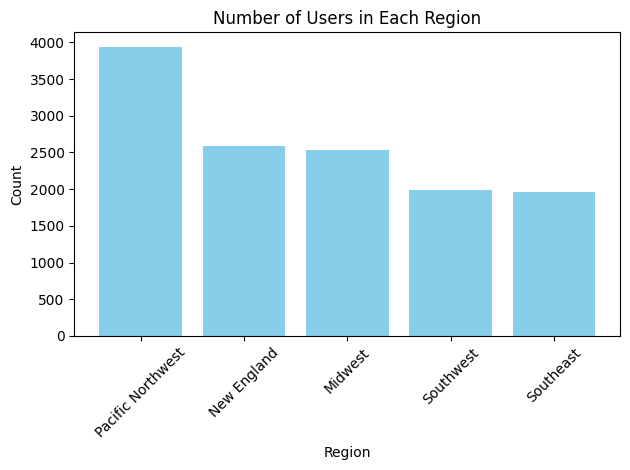

In [54]:
import matplotlib.pyplot as plt

# Assuming 'users' dataframe is already loaded and exists

# Count the number of occurrences for each region
region_counts = users['region'].value_counts()

# Plot the bar graph
plt.bar(region_counts.index, region_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Users in Each Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


2)
I found that their is a slight difference between the number of desktop and mobile device users from consumers. This could be due to a number of reason such as better online service from the desktop or potentially an older demographic of consumers who are less prone to use mobile devices suggesting that further research may be beneficial.

In the case of regional differences it seems that distribution appears fairly normal across regions excluding the Pacific Northwest. This could be due to a longer development period in this region or that consumers here have great use of the profuct but also warrants further research.

3)
I personally would not recommend the continued development of the product because it failed to have consistent results across the three factors of engagement. There was some association with a higher number of searches being made per individual but it did not translate into higher engagement forms such as vdps and saleS. Because of these factors I believe it would be beneficial to save resources for other projects and means of garnering engagement that show better results as a whole.